In [15]:
import numpy as np
import time
import pf_pytools.pf_fort_io as pf_fort_io
import pfio
import matplotlib.pyplot as plt
import xarray as xr

In [16]:
input_pfb = '/home/arezaii/data/CONUS.5layer.pfclm.run4.out.clm_output.00002.C.pfb'

In [17]:
t2 = time.perf_counter()
pfb_read_rtn = pfio.pfread(input_pfb)
# Flip not needed with new PFIO code
# pfb_read_rtn = np.flip(pfb_read_rtn,axis=1)
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.8376 seconds


In [18]:
t2 = time.perf_counter()
pfb_data_in = np.zeros((3342,1888,17), order='F')
pf_fort_io.pfb_read(pfb_data_in, input_pfb)
# X Y Z -> Z Y X
pfb_data_in = np.transpose(pfb_data_in,(2,1,0))
t3 = time.perf_counter()
print(f'load time {t3-t2:0.4f} seconds')

load time 0.6489 seconds


## Use numpy testing to make sure the data are all equal.

this function returns None if the arrays are exactly the same, otherwise an exception will be thrown.

In [19]:
np.testing.assert_array_equal(pfb_data_in, pfb_read_rtn)

## Prepare for plotting

Used xarray because it provides convenient plotting features

In [20]:
xds1 = xr.DataArray(pfb_read_rtn)
xds2 = xr.DataArray(pfb_data_in)

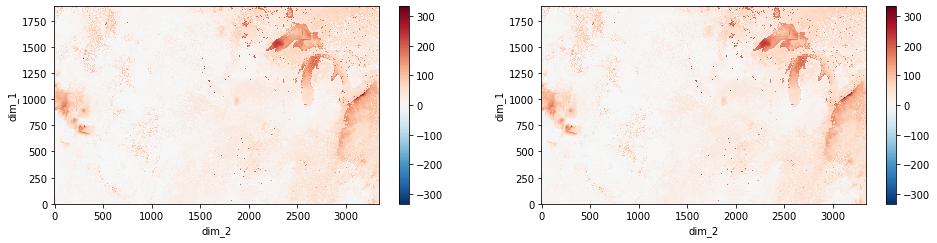

In [21]:
fig = plt.figure(figsize=[16, 8])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[0,:,:].plot(ax=ax1)
xds2[0,:,:].plot(ax=ax2)

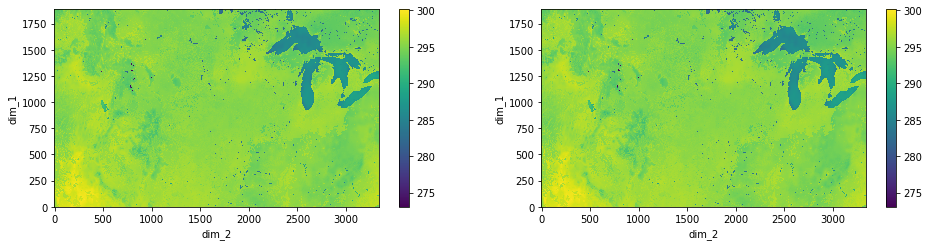

In [22]:
fig = plt.figure(figsize=[16, 8])
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
xds1[-1,:,:].plot(ax=ax1)
xds2[-1,:,:].plot(ax=ax2)

In [23]:
del(pfb_data_in)
del(pfb_read_rtn)

In [ ]:
del(xds1)
del(xds2)